In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [ ]:
data  = pd.read_csv("https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv")

In [ ]:
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [ ]:
data.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [ ]:
data["Date"] = pd.to_datetime(data['Date'])
df = data.sort_values(by='Date')
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


In [ ]:
df.reset_index(inplace=True)

In [ ]:
df.head()

,index,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
1,2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2,2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
3,2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
4,2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


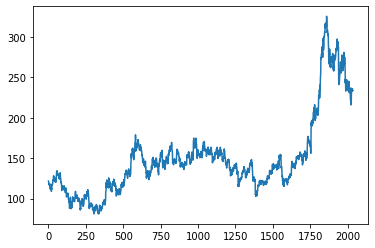

In [ ]:
plt.plot(df['Close'])

In [ ]:
df1 = df['Close']

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))
df1

array([[0.16584967],
       [0.16319444],
       [0.1621732 ],
       ...,
       [0.62622549],
       [0.62214052],
       [0.62418301]])

In [ ]:
training_size = int(len(df1)*0.70)
test_size = len(df1) - training_size

train_data = df1[0:training_size,:]
test_data = df1[training_size:len(df1),:1]

In [ ]:
training_size, test_size

(1424, 611)

In [ ]:
def datasetCrtd(dataset,time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+ time_step,0])
    return np.array(dataX), np.array(dataY)

In [ ]:
time_step = 100
X_train, y_train = datasetCrtd(train_data, time_step)
X_test, y_test = datasetCrtd(test_data,time_step)

In [ ]:
print(X_train.shape), print(y_train.shape)

(1323, 100)
(1323,)


(None, None)

In [ ]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1],1)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model = Sequential()
model.add(LSTM( 50, return_sequences=True, input_shape=(100,1)))
model.add(LSTM( 50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_absolute_error', optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train, y_train, validation_split=0.1, epochs=60, batch_size=64, verbose=1)

Epoch 1/60
19/19 [==============================] - 10s 248ms/step - loss: 0.0731 - val_loss: 0.0320
Epoch 2/60
19/19 [==============================] - 4s 185ms/step - loss: 0.0277 - val_loss: 0.0287
Epoch 3/60
19/19 [==============================] - 4s 181ms/step - loss: 0.0233 - val_loss: 0.0272
Epoch 4/60
19/19 [==============================] - 3s 176ms/step - loss: 0.0221 - val_loss: 0.0270
Epoch 5/60
19/19 [==============================] - 3s 178ms/step - loss: 0.0236 - val_loss: 0.0248
Epoch 6/60
19/19 [==============================] - 3s 179ms/step - loss: 0.0218 - val_loss: 0.0248
Epoch 7/60
19/19 [==============================] - 3s 177ms/step - loss: 0.0211 - val_loss: 0.0227
Epoch 8/60
19/19 [==============================] - 3s 178ms/step - loss: 0.0202 - val_loss: 0.0230
Epoch 9/60
19/19 [==============================] - 3s 176ms/step - loss: 0.0198 - val_loss: 0.0204
Epoch 10/60
19/19 [==============================] - 3s 174ms/step - loss: 0.0188 - val_loss: 0.019

In [ ]:
test_predict= model.predict(X_test)

In [ ]:
test_predict1 = scaler.inverse_transform(test_predict)

In [ ]:
test_predict1

array([[143.28693 ],
       [143.35298 ],
       [141.07219 ],
       [136.8113  ],
       [138.24315 ],
       [138.6861  ],
       [141.07933 ],
       [141.42177 ],
       [139.42232 ],
       [139.04489 ],
       [140.02257 ],
       [143.43887 ],
       [142.36008 ],
       [145.23831 ],
       [147.86877 ],
       [138.94955 ],
       [139.76036 ],
       [143.46085 ],
       [143.63739 ],
       [153.81294 ],
       [152.71524 ],
       [151.65932 ],
       [152.10992 ],
       [148.77821 ],
       [153.93655 ],
       [151.77985 ],
       [152.73491 ],
       [155.61192 ],
       [153.40271 ],
       [153.1669  ],
       [154.97305 ],
       [151.07373 ],
       [146.22566 ],
       [139.05563 ],
       [140.98158 ],
       [141.5524  ],
       [140.61435 ],
       [136.92715 ],
       [133.20517 ],
       [129.1551  ],
       [129.59758 ],
       [129.78767 ],
       [125.35574 ],
       [126.499825],
       [122.38819 ],
       [119.546455],
       [122.0377  ],
       [121.5